<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/EXERCISE_2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Exercise 2.5

Name: Juan Manuel G.G

Date: February 2021

### 1. Process description 

Two surge tanks are used to dampen pressure ﬂuctuations caused by erratic operations of a large air compressor. The discharge pressure of the compressor is Pd(t) and the operating pressure of the furnace is Pf (constant)


### 2. Assumptions 

1. The valve resistences are contant

2. The valve flow characteristics are linear $w_b = (P_1 - P_2)/R_b$

3. The surge processes operate isothermally

4. The ideal gas law holds 

### 3. Process Scheme 

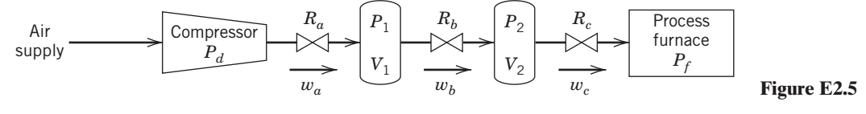

Figure 1. Process Scheme

### 4. Analysis

#### Establish the model 

Mass balance tank 1

$$
\frac{dm_1}{dt} = w_a - w_b 
$$

$$
\frac{M V_1}{R T_1} \frac{dP_1}{dt} = w_a - w_b \tag{1}
$$

Molar balance tank2

$$
\frac{M V_2}{R T_2} \frac{dP_2}{dt} = w_b - w_c \tag{2}
$$

where 

$$
w_a = \frac{P_d - P_1}{R_a}, \hspace{1cm} w_b = \frac{P_1 - P_2}{R_b}, \hspace{1cm} w_c = \frac{P_2 - P_f}{R_c}
$$

#### Steady state

Equating (1) and (2) to zero we get 

$$
\frac{P_d - P_1}{R_a} - \frac{P_1 - P_2}{R_b} = 0 \tag{3}
$$

$$
\frac{P_1 - P_2}{R_b} - \frac{P_2 - P_f}{R_c} = 0 \tag{4}
$$


In [1]:
import sympy as sp

In [2]:
# create symbols
Pd, P1, Ra, P2, Rc, Pf, Rb = sp.symbols("Pd, P1, Ra, P2, Rc, Pf, Rb")

In [3]:
# write equations 
eq1 = sp.Eq((Pd - P1)/Ra - (P1 - P2)/Rb, 0)
eq2 = sp.Eq((P1 - P2)/Rb - (P2 - Pf)/Rc, 0)

In [4]:
# solve equations
sp.solve([eq1, eq2],[P1, P2])

{P1: (Pd*Rb + Pd*Rc + Pf*Ra)/(Ra + Rb + Rc),
 P2: (Pd*Rc + Pf*Ra + Pf*Rb)/(Ra + Rb + Rc)}

so the steady state is 

$$
P_1 = \frac{P_d(R_b + R_c) + P_f R_a}{\sum R}, \hspace{1cm} P_2 = \frac{P_f(R_a + R_b) + P_d R_c}{\sum R} \tag{5}
$$

#### Degrees of freedom analysis 

state variables: P1, P2 (2)

equations: 2 DE (2)

degrees of freedom: 2 - 2 = 0

inputs: Pd, Pf

parameters: Ri, M, V1, V2, R, T1, T2

#### Numerical simulation

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [16]:
# write the model 
def surge(s,t,p,u):
    
    # state variables
    p1 = s[0]
    p2 = s[1]

    # inputs
    pd = u[0]
    pf = u[1]

    # parameters
    Ra = p[0]
    Rb = p[1]
    Rc = p[2]
    M = p[3]
    V1 = p[4]
    V2 = p[5]
    R = p[6]
    T1 = p[7]
    T2 = p[8]

    # mass flows
    wa = (pd-p1)/Ra
    wb = (p1-p2)/Rb
    wc = (p2-pf)/Rc

    # mass balance tank 1
    dp1dt = R*T1/(M*V1)*(wa - wb)

    # mass balance tank 2
    dp2dt = R*T2/(M*V2)*(wb - wc)

    return [dp1dt, dp2dt]

In [26]:
# establish parameters 
p = [10, 15, 20, 120, 1.2, 1.5, 0.8314, 278, 320]

# establish inputs
u = [210, 105]

# establish initial conditions
s = [100, 50]

# set integration time 
time = np.linspace(0,100,100)

In [27]:
out = odeint(surge,s,time,args=(p,u))

In [28]:
p1 = out[:,0]
p2 = out[:,1]

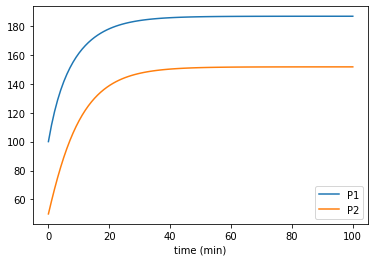

In [32]:
plt.plot(time, p1, time, p2)
plt.xlabel("time (min)")
plt.legend(["P1", "P2"])

In [30]:
def steady_state(p,u):
    
    # inputs
    Pd = u[0]
    Pf = u[1]

    # parameters
    Ra = p[0]
    Rb = p[1]
    Rc = p[2]

    # steady state equations
    P1 = (Pd*Rb + Pd*Rc + Pf*Ra)/(Ra + Rb + Rc)
    P2 = (Pd*Rc + Pf*Ra + Pf*Rb)/(Ra + Rb + Rc)

    return [P1, P2]

In [31]:
steady_state(p,u)

[186.66666666666666, 151.66666666666666]